## 1. Listado de variables y selección

## Descripcion general de Datos:
A continuacion se presentan el variable del dataset *Cardiovascular Disease*

| Variable                            | Definición                                                                                                                                                                                                                                 | Unidad de medida                | Tipo de dato                                                                      | Tipo de variable | Transformaciones   necesarias                                                          |
|-------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------|-----------------------------------------------------------------------------------|------------------|----------------------------------------------------------------------------------------|
| Age - Edad                          | Determina   la edad del paciente                                                                                                                                                                                                           | Días                            | Integer                                                                           | Entrada          | Edad   escalada = Días /36000                                                          |
| Height - Altura                     | Determina   la altura del paciente                                                                                                                                                                                                         | Centímetros                     | Integer                                                                           | Entrada          | Altura   escalada = Centrimetros / 100                                                 |
| Weight - Peso                       | Determina   la pero del paciente                                                                                                                                                                                                           | Kilogramos                      | Float                                                                             | Entrada          | Peso   escalada = Kilogramos / 100                                                     |
| Gender - Genero                     | Determina   la género del paciente                                                                                                                                                                                                         | Categoría                       | 1   - Mujer     2 - Hombre                                                        | Entrada          | 0   - Mujer     1 - Hombre                                                             |
| ap_hi - Presión arterial sistólica  | Corresponde   al valor máximo de la presión arterial en sístole, cuando el corazón se   contrae, del paciente                                                                                                                              | mmHg   - Milímetros de mercurio | Integer                                                                           | Entrada          | Milímetros   de mercurio escalado = mmHg /100                                          |
| ap_lo - Presión arterial diastólica | Hace   referencia a la presión que la sangre ejerce cuando el corazón se   relaja para volver a llenarse de sangre                                                                                                                         | mmHg   - Milímetros de mercurio | Integer                                                                           | Entrada          | Milímetros   de mercurio escalado = mmHg /100                                          |
| Cholesterol - Colesterol            | Sustancia   parecida a la grasa que se encuentra en todas las células de su cuerpo. Pese   a que las cifras elevadas de colesterol en la sangre tienen consecuencias   perjudiciales para la salud, es una sustancia estructural esencial. | Categoría                       | 1   - Normal     2 - Por encima de lo normal      3 - Muy por encima de lo normal | Entrada          | 0,3   - Normal     0,6 - Por encima de lo normal     0,9 - Muy pro encima de lo normal |
| Gluc - Glucemia                     | Medida   de concentración de la glucosa en el plasma sanguíneo. Este análisis sobre   todo se realiza para estudiar la posible presencia de una diabetes                                                                                   | Categoría                       | 1   - Normal     2 - Por encima de lo normal      3 - Muy por encima de lo normal | Entrada          | 0,3   - Normal     0,6 - Por encima de lo normal     0,9 - Muy pro encima de lo normal |
| Smoke - Fumador                     | Determina   si el paciente fuma o no                                                                                                                                                                                                       | Categoría   binaria             | 0   - No     1 - Si                                                               | Entrada          | Nada                                                                                   |
| Alco - Consumo de alcohol           | Determina   si el paciente consume alcohol o no                                                                                                                                                                                            | Categoría   binaria             | 0   - No     1 - Si                                                               | Entrada          | Nada                                                                                   |
| Active - Actividad Física           | Determina   si el paciente realiza actividad física o no                                                                                                                                                                                   | Categoría   binaria             | 0   - No     1 - Si                                                               | Entrada          | Nada                                                                                   |
| Cardio                              | Variable   target, la cual indica la presencia o ausencia de una enfermedad   cardiovascular                                                                                                                                               | Categoría   binaria             | 0   - No     1 - Si                                                               | Salida           | Nada                                                                                   |

In [182]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [183]:
full = pd.read_csv('data/cardio_train.csv', sep=';')

full.head() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Limpieza y pre-procesado de datos:
En el dataset elegido nos econtramos con dos inconvenientes a resolver:
     * La edad de los pacientes estaba expresada en dias.
     * Existian valores aberrantes en las variables asociadas a la presion y la altura del paciente dentro del conjunto.

Tomamos las siguientes decisiones para que estos inconventientes no dificulten y afecten el analisis.

In [184]:
# Transformamos edad de dias a años
full['age'] = full['age']/365

#Eliminamos todos quellos valores que no se encuentren en el rango (40,250)
full =full[full['ap_hi'] <= 250]
full =full[full['ap_hi'] >= 40]

#Eliminamos todos quellos valores que no se encuentren en el rango (0,200)
full =full[full['ap_lo'] <= 200]
full =full[full['ap_lo'] >= 0]

#Eliminamos todos quellos valores que se encuentren por debajo de 60 kilogramos
full =full[full['height'] >= 60]

full.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [185]:
#Creamos el set de entrenamiento y el set de prueba
train, test = train_test_split(full, test_size=0.33, random_state=5)

train.shape, test.shape

((46108, 13), (22711, 13))

In [186]:
full.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [187]:
full.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000,68819.000000
mean,49969.933013,53.326299,1.348755,164.364899,74.121201,126.614569,81.334951,1.364710,1.225926,0.087984,0.053633,0.803412,0.494863
std,28843.512407,6.762222,0.476580,8.162036,14.331607,16.766651,9.843130,0.678992,0.571888,0.283274,0.225295,0.397421,0.499977
min,0.000000,29.583562,1.000000,60.000000,11.000000,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.500000,48.375342,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50012.000000,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74857.500000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Consulto que no hayan quedado datos nulos

In [188]:

full.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 2. Análisis detallado de un conjunto de variables

## Balaceo de datos:
Como podemos observar, el dataset está balanceado
Esto nos favorece ya que reducimos las probabilidades de sobrentrenar por una buena distribución de casos positivos y negativos

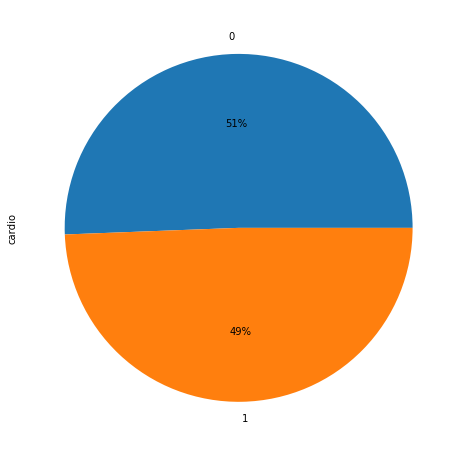

In [189]:
train.cardio.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

### Analisis de la variable Colesterol
Como mencionamos anteriormente, contamos con 3 valores posibles:
1. Normal
2. Por encima de lo normal 
3. Muy por encima de lo normal 

Vemos que esta variable influye de forma negativa a la variable de salida, ya que cuando mayor es el nivel de colesterol, mayor es el riesgo de tener una enfermedad cardiovascular 

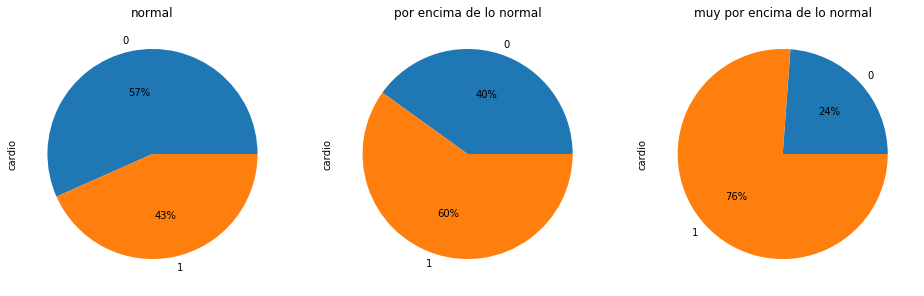

In [190]:
fig, axes = plt.subplots(nrows=1, ncols= train.cholesterol.nunique(), figsize=(16,6))

for c, i in zip(np.sort(train.cholesterol.unique()), range(3)):
    train[train.cholesterol == c].cardio.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[i])
    axes[i].set_title('normal' if c == 1 else ('por encima de lo normal' if c == 2 else 'muy por encima de lo normal'))

### Analisis de la variable Glucemia
De forma similar a la variable vista anteriormente, también contamos con los mismo valores posibles
Si bien podemos observar también afecta de forma directa, vemos que afecta a la variable de salida con menor grado que la variable anterior


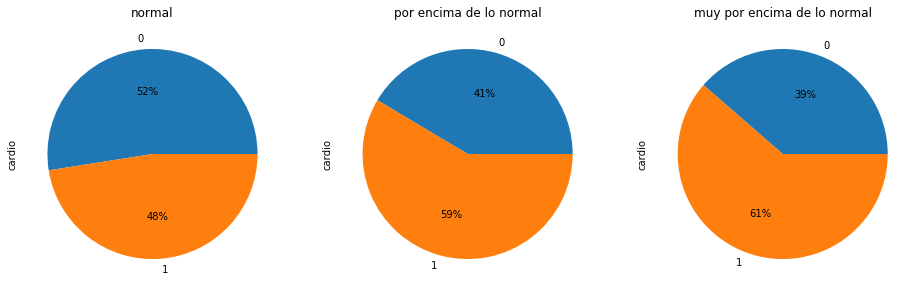

In [191]:
fig, axes = plt.subplots(nrows=1, ncols= train.gluc.nunique(), figsize=(16,6))

for c, i in zip(np.sort(train.gluc.unique()), range(3)):
    train[train.gluc == c].cardio.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[i])
    axes[i].set_title('normal' if c == 1 else ('por encima de lo normal' if c == 2 else 'muy por encima de lo normal'))

### Analisis de la variable Fumador
En este caso queremos evaluar si influye el hecho que una persona fume o no
Podemos observar que si la persona no fuma, no afecta a la faviable de salida ya que los datos quedan balanceados en un % 50
Y en el caso de que sí fume, no afecta con mucha importancia el resultado de salida
Vemos que aumenta levemente el porcentaje de casos positivos pero esta variable no presenta demaciada importancia

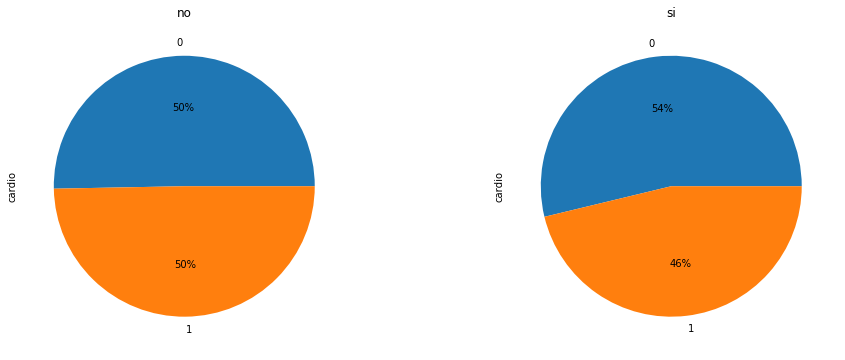

In [192]:
fig, axes = plt.subplots(nrows=1, ncols= train.smoke.nunique(), figsize=(16,6))

for c, i in zip(np.sort(train.smoke.unique()), range(2)):
    train[train.smoke == c].cardio.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[i])
    axes[i].set_title('si' if c == 1 else 'no')

In [193]:
### Analisis de la variable Genero
Quisimos analizar si alguno de los dos sexos era más propenso a tener enfermedades cardíacas 
Como se puede observar, el set de datos cuenta con un amplio porcentaje de hombres, pero al tomar los casos positivos vemos que la distribución entre hombres y mujeres se mantiene casi igual
Vemos que ambos sexos están balanceados casi en un 50/50
Por lo que concluimos que ambos sexos tienen la misma probabilidad de padecer una enfermedad cardiovascular 

SyntaxError: invalid syntax (<ipython-input-193-d2cbcc5883b3>, line 2)

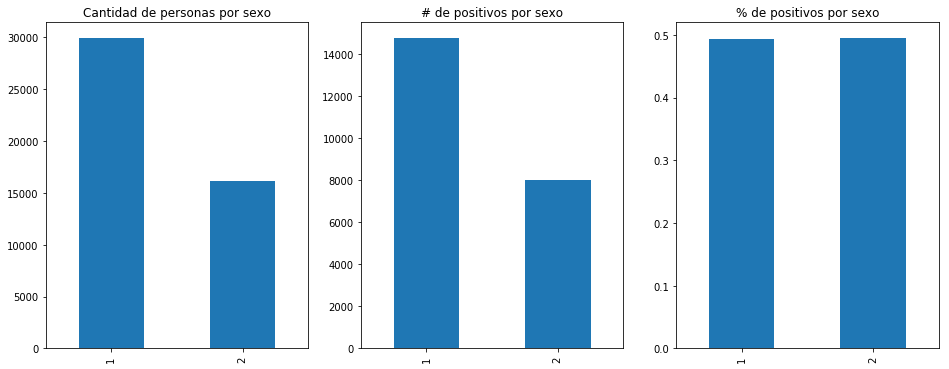

In [194]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('Cantidad de personas por sexo')
train.gender.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# de positivos por sexo')
train[train.cardio == 1].gender.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% de positivos por sexo')
(train[train.cardio == 1].gender.value_counts().sort_index() / train.gender.value_counts().sort_index()).plot.bar(ax=ax[2])

### Analisis de las variables Edad y Fumador
En este último análisis quisimos ver si la edad y el fumar están relacionados con los problemas cardiovasculares
Mediaste el siguiente gráfico podemos observar que las personas que fuman comienzan a padecer este tipo de enfermedades a una edad más temprana que el resto
De esta forma podemos ver que el fumar influye más de lo esperado por lo observado en el otro gráfico

/home/iganciorey/ML/TP1/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


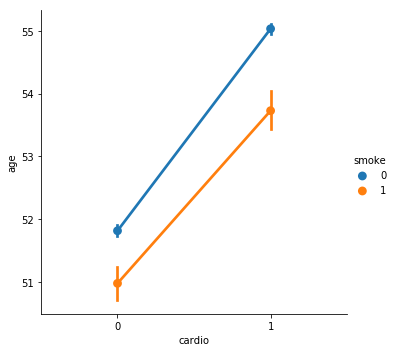

In [195]:
sns.factorplot('cardio','age',hue='smoke',data=train)
plt.show()